### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt  
import datetime
sns.set(color_codes=True) 
%matplotlib inline 

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
# loading the movie ratings into a dataset
movie_ratings = pd.read_csv('Data.csv')
# loading the movie related information into a dataset
movie_info = pd.read_csv('item.csv')
# loading the user information into a dataset
user_Info = pd.read_csv('user.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [3]:
# exploring the the data in each dataframe

# ***************************
# *****For ratings data******
# ***************************
# exploring few records to see how the data looks like
movie_ratings.head(10)

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [4]:
# Lets look at the dimensions of the dataset
movie_ratings.shape


(100000, 4)

In [5]:
# lets look at some infiormation about dataset dtype, columns and non-null values etc
movie_ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [6]:
# we can use describe the data set to get 5 number summary, mean and SD
movie_ratings.describe()


,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [7]:
#count the null values in datset
movie_ratings.isnull().sum().sum()

0

In [8]:
# **************************************
# *****For movies information data******
# **************************************
# exploring few records to see how the data looks like
movie_info.head(10)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe,01-Jan-1995,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III,22-Jan-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
# Lets look at the dimensions of the dataset
movie_info.shape

(1681, 22)

In [10]:
# lets look at some infiormation about dataset dtype, columns and non-null values etc
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [11]:
# we can use describe the data set to get 5 number summary, mean and SD
movie_info.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#just another way to count the null values in datset
movie_info.isnull().sum().sum()

0

In [13]:
# ***************************
# *****For user information data******
# ***************************
# exploring few records to see how the data looks like
user_Info.head(10)

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [14]:
# Lets look at the dimensions of the dataset
user_Info.shape

(943, 5)

In [15]:
# lets look at some infiormation about dataset dtype, columns and non-null values etc
user_Info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [16]:
# we can use describe the data set to get 5 number summary, mean and SD
user_Info.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [17]:
#just another way to count the null values in datset
user_Info.isnull().sum().sum()

0

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [18]:
# first lets remove the single quote in name on one of the coulmns
movie_info.columns.str.replace('\'','')
# now lets find the number of movies in each genre 
movie_info[movie_info.columns[4:]].sum(axis=0)

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [19]:
#dropping the rows where the genre is unknown
movie_info.drop(movie_info[movie_info['unknown']>0].index, inplace = True)
#just to confim that the row is dropped, this should return zero rows
movie_info[movie_info['unknown']>0]
movie_info

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [20]:

# get all the columns for the Genre
columnsForGenre = movie_info.columns[4:]  #.sum(axis=1)

#create a new column in movie_info that is sum of all the genre coulmns
movie_info['total_genre'] =  movie_info[columnsForGenre].sum(axis=1)

# lets extract the data of out interest from the dataframe
data = [movie_info['movie title'], movie_info['total_genre']]

# name the headers for the new dataframe
headers = ["movie_title", "total_genre"]

# create the dataframe
desiredDataframe= pd.concat(data, axis=1, keys=headers)

#list of movies with more than one genre
print(desiredDataframe[desiredDataframe['total_genre']>1])



             movie_title  total_genre
0             Toy Story             3
1             GoldenEye             3
3            Get Shorty             3
4               Copycat             3
6        Twelve Monkeys             2
...                  ...          ...
1667  MURDER and murder             3
1668            Tainted             2
1671             Mirage             2
1677          B. Monkey             2
1678      Sliding Doors             2

[849 rows x 2 columns]


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

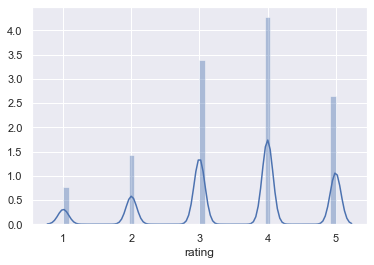

In [21]:
# lets look at ratings
sns.distplot(movie_ratings['rating'])


([<matplotlib.axis.YTick at 0x10c6633a0>], [Text(0, 0, '0.00')])

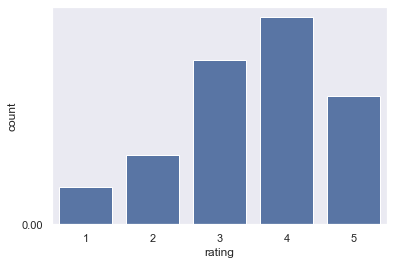

In [22]:
# rating plot in %
n_points = movie_ratings.shape[0] * 10

max_count = movie_ratings['rating'].value_counts().max()
max_prop = max_count / n_points  

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = movie_ratings, x = 'rating', color = base_color)
plt.yticks(tick_props * n_points, tick_names)


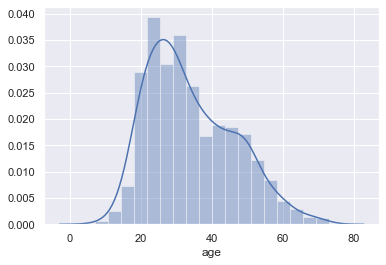

In [23]:
# plot the Age
sns.distplot(user_Info['age'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]),
 <a list of 71 Text major ticklabel objects>)

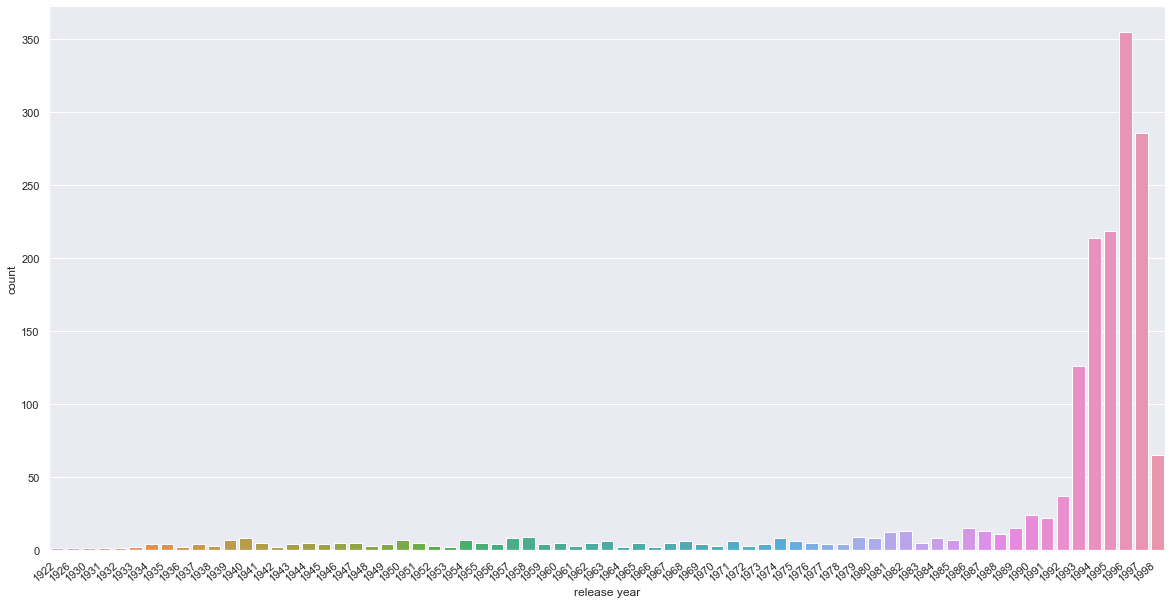

In [24]:


# Plot for the release years

movie_info['release date'] = pd.DatetimeIndex(movie_info['release date']).year
movie_info.rename(columns={'release date':'release year',}, inplace=True)

plt.figure(figsize=(20, 10))
sns.countplot(movie_info['release year'])

plt.xticks(rotation=40, ha='right')



([<matplotlib.axis.YTick at 0x1220228b0>,
 [Text(0, 0, '0.00'),
  Text(0, 0, '0.05'),
  Text(0, 0, '0.10'),
  Text(0, 0, '0.15'),
  Text(0, 0, '0.20'),
  Text(0, 0, '0.25'),
  Text(0, 0, '0.30'),
  Text(0, 0, '0.35'),
  Text(0, 0, '0.40'),
  Text(0, 0, '0.45'),
  Text(0, 0, '0.50'),
  Text(0, 0, '0.55'),
  Text(0, 0, '0.60'),
  Text(0, 0, '0.65'),
  Text(0, 0, '0.70')])

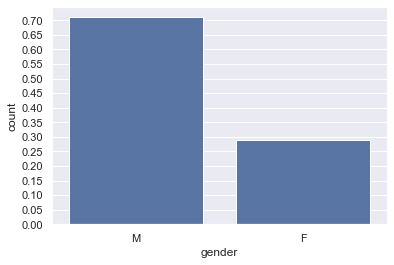

In [25]:
# plot for Gender

n_points = user_Info.shape[0]
max_count = user_Info['gender'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = user_Info, x = 'gender', color = base_color)
plt.yticks(tick_props * n_points , tick_names)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

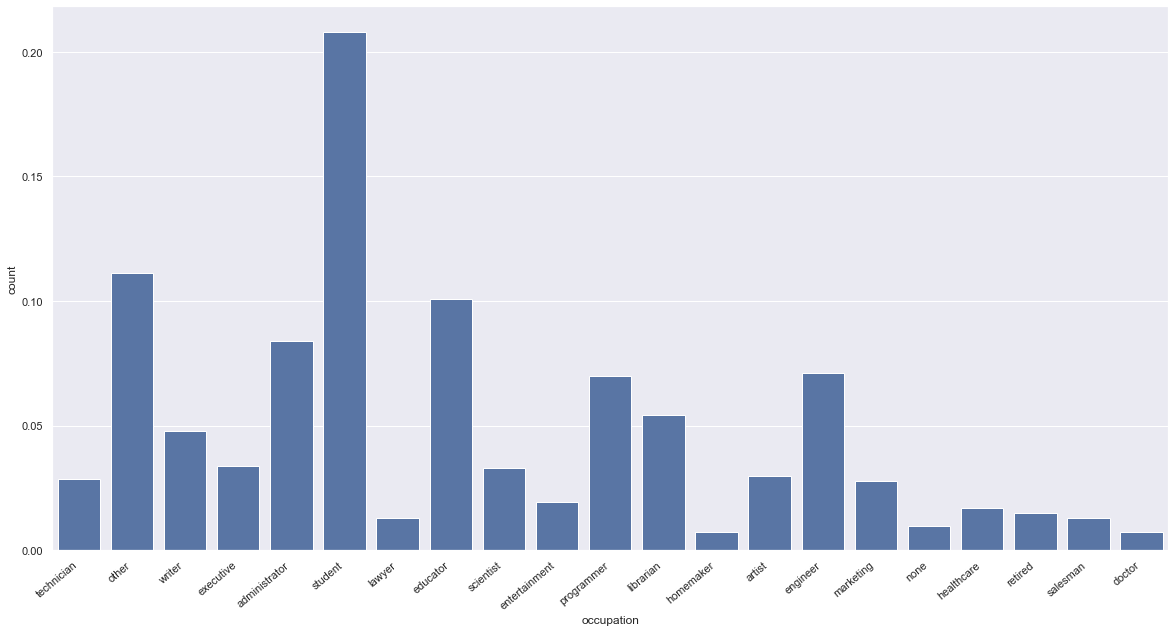

In [26]:
# plot for Occupations

n_points = user_Info.shape[0]
max_count = user_Info['occupation'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
plt.figure(figsize=(20, 10))
sns.countplot(data = user_Info, x = 'occupation', color = base_color)
plt.yticks(tick_props * n_points , tick_names)
plt.xticks(rotation=40, ha='right')




### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [27]:
movie_info_copy = movie_info.copy()
# *********
# # convert the release year ro percentage
# df[percent] = (df['column_name'] / df['column_name'].sum()) * 100
# #set release year as index
# df.set_index('month')
# ******
# movie_info_copy.set_index('release year')
movie_info_copy.head(10)

,movie id,movie title,release year,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total_genre
0,1,Toy Story,1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,3,Four Rooms,1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,Get Shorty,1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,3
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao),1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,7,Twelve Monkeys,1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
7,8,Babe,1995,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,3
8,9,Dead Man Walking,1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,10,Richard III,1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2


In [28]:
movie_info_copy.drop(['total_genre', 'movie title', 'movie id'], axis=1, inplace=True)

# var = movie_info_copy.groupby('release year').sum()
# newdict = var.to_dict()
# print(newdict)

# movie_info_copy.head()
var = movie_info_copy.groupby('release year').size().to_dict()
# print(var)
# movie_info_copy 
# for row in movie_info_copy.itertuples(index=False): 
#     movie_info_copy['total'] = 
# total = movie_info_copy.groupby('release year').size()
df = movie_info_copy.groupby('release year').sum()
df['total']=np.nan
i=0
for row in df.itertuples(index=False):
    df.iloc[i,19] = var[df.index.values[i]]
    i=i+1


In [29]:
df_percent = df.div(df['total'], axis= 0) * 100

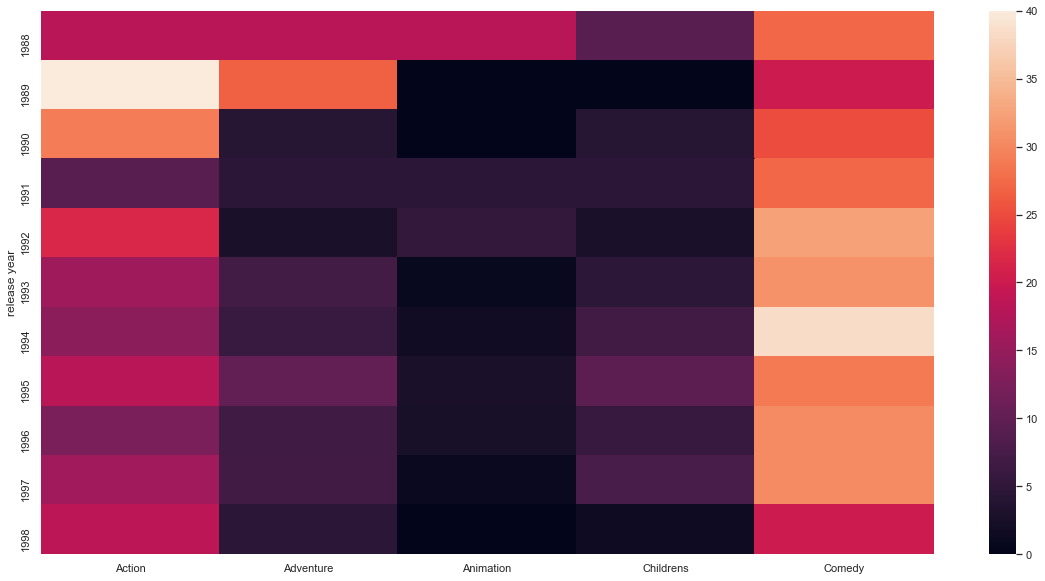

In [30]:
plt.figure(figsize=(20, 10))
# we can plot various heat maps for different time duration as below
#10 years data from 1988 to 1998 shows how different genres were poppular over 10 year time
sns.heatmap(df_percent.iloc[60:, 1:6:])

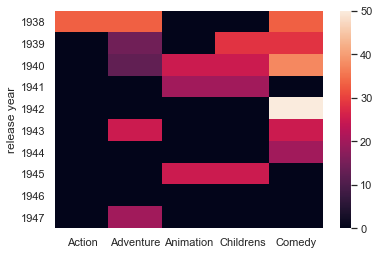

In [31]:
# 1938 to 1947
sns.heatmap(df_percent.iloc[10:20, 1:6:])

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [32]:
# merge all the datasets
mergedDataframe = pd.merge(pd.merge(movie_ratings,user_Info),movie_info)

In [33]:
# find the higly rated movies
movie_rate = mergedDataframe.groupby('movie title').agg({'rating': [np.size, np.mean]})


In [34]:
movie_rate.sort_values([('rating', 'mean')], ascending=False).head()

rating     
                                              size mean
movie title                                            
Great Day in Harlem, A                           1  5.0
Prefontaine                                      3  5.0
Someone Else's America                           1  5.0
Entertaining Angels: The Dorothy Day Story       1  5.0
Marlene Dietrich: Shadow and Light (             1  5.0

In [35]:
#condition for rating size >100
ratedAtleast100 = movie_rate['rating']['size'] >= 100
#top 25 movies are
movie_rate[ratedAtleast100].sort_values([('rating', 'mean')], ascending=False)[:25]

rating          
                                                     size      mean
movie title                                                        
Close Shave, A                                        112  4.491071
Schindler's List                                      298  4.466443
Wrong Trousers, The                                   118  4.466102
Casablanca                                            243  4.456790
Shawshank Redemption, The                             283  4.445230
Rear Window                                           209  4.387560
Usual Suspects, The                                   267  4.385768
Star Wars                                             583  4.358491
12 Angry Men                                          125  4.344000
Citizen Kane                                          198  4.292929
To Kill a Mockingbird                                 219  4.292237
One Flew Over the Cuckoo's Nest                       264  4.291667
Silence of the Lambs, The                             390  4.289744
North by Northwest                                    179  4.284916
Godfather, The                                        413  4.283293
Secrets & Lies                                        162  4.265432
Good Will Hunting                                     198  4.262626
Manchurian Candidate, The                             131  4.259542
Dr. Strangelove or: How I Learned to Stop Worry...    194  4.252577
Raiders of the Lost Ark                               420  4.252381
Vertigo                                               179  4.251397
Titanic                                               350  4.245714
Lawrence of Arabia                                    173  4.231214
Maltese Falcon, The                                   138  4.210145
Empire Strikes Back, The                              367  4.204360

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [36]:

mergedDf = pd.merge(pd.merge(movie_ratings,user_Info),movie_info)

In [37]:
movie_info['unknown'].replace(0,1, inplace=True)

In [38]:
df_total = mergedDf[['unknown', 'gender']]
df_totalGrp = df_total.groupby('gender').count()


In [39]:
# total, male and female population that watched movies
totalFemalePopulation = df_totalGrp.iloc[0,0]
totalMalePopulation = df_totalGrp.iloc[1,0]
Totalpolulation = totalFemalePopulation + totalMalePopulation
mergedDf.drop(['unknown'], axis=1, inplace=True)

In [40]:
df_drama = mergedDf[['Drama', 'gender']]

In [41]:
# Drama movies by gender
df_dramaGrp = df_drama.groupby('gender').sum()
df_dramaGrp_percent = df_dramaGrp.div(Totalpolulation, axis= 0) * 100

In [42]:
# Population of mle and females watching drama in percentage
df_dramaGrp_percent
#clearly Males watch more drama SO the statement is true


,Drama
gender,
F,11.009101
M,28.889889


In [43]:
df_SiFI=mergedDf[['Sci-Fi', 'gender']]


In [44]:
# Sci-Fi movies by gender
df_SiFIGrp = df_SiFI.groupby('gender').sum()
df_SiFIGrp_percent = df_SiFIGrp.div(Totalpolulation, axis= 0) * 100

In [45]:
# Population of male and females watching Sci-Fi in percentage
df_SiFIGrp_percent
#clearly Men watch more Sci-Fi so the statement is false


,Sci-Fi
gender,
F,2.629263
M,10.102010


In [46]:
df_Romace=mergedDf[['Romance', 'gender']]

In [47]:
df_RomanceGrp = df_Romace.groupby('gender').sum()
df_RomanceGrp_percent = df_RomanceGrp.div(Totalpolulation, axis= 0) * 100

In [48]:
# Population of male and females watching Romance in percentage
df_RomanceGrp_percent
#clearly Men watch more Romance so the statement is true

,Romance
gender,
F,5.858586
M,13.604360
